## Import TensorFlow and required libraries

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

## Load the Dataset

In [3]:
# Load the dataset

cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [4]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)


In [5]:
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [6]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [7]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


## Build the model using functional API

In [8]:
# Build the model using the functional API

i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [10]:
# Check GPU availability
print("GPU", "available (Yesss!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (Yesss!!!)


## Train the model

In [12]:
# Compile and fit
# Note: make sure you are using the GPU for this:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 28s 12ms/step - loss: 1.5933 - accuracy: 0.4156 - val_loss: 1.3065 - val_accuracy: 0.5193
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2909 - accuracy: 0.5347 - val_loss: 1.2467 - val_accuracy: 0.5556
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1611 - accuracy: 0.5812 - val_loss: 1.0564 - val_accuracy: 0.6186
Epoch 4/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0611 - accuracy: 0.6170 - val_loss: 0.9950 - val_accuracy: 0.6444
Epoch 5/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9940 - accuracy: 0.6450 - val_loss: 0.9286 - val_accuracy: 0.6747
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9313 - accuracy: 0.6684 - val_loss: 0.9259 - val_accuracy: 0.6764
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8794 - accuracy: 0.6865 - val_loss: 0.9047 -

## Evaluate the model

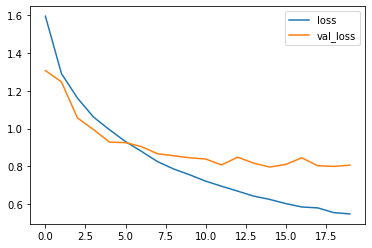

In [14]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

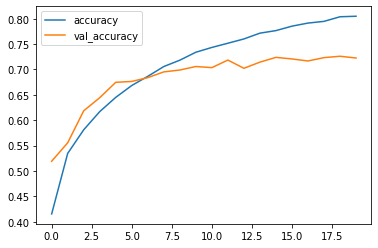

In [15]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [16]:
# Confusion matrix function
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(conf_mat)

  plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mat.max() / 2.
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
      plt.text(j, i, format(conf_mat[i, j], fmt),
               horizontalalignment="center",
               color="white" if conf_mat[i, j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

Confusion matrix, without normalization
[[700  30  38  20  24   6   6  15 110  51]
 [ 13 868   4   5   2   3   5   1  14  85]
 [ 47  14 552  75 120  75  58  30  19  10]
 [ 14  11  39 536  81 187  58  31  14  29]
 [  9   4  37  68 728  36  25  73  15   5]
 [  8   8  22 183  54 628  24  48  12  13]
 [  2  12  34  69  58  34 770   4  10   7]
 [ 10   6  25  38  56  50   9 778   5  23]
 [ 35  47   7  14   8   6   8   2 847  26]
 [ 15  93   5  10   6   9   4  13  27 818]]


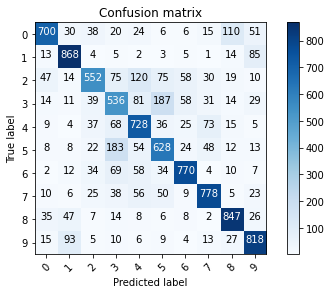

In [18]:
# Plot the confusion matrix
pred_test = model.predict(X_test).argmax(axis=1)
conf_mat = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(conf_mat, list(range(10)))

## Show True-Classified and Misclassified Example

In [19]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

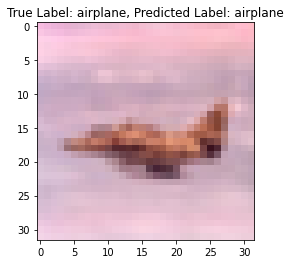

In [21]:
# Show True-classified examples
true_classified_idx = np.where(pred_test == y_test)[0]
i = np.random.choice(true_classified_idx)
plt.imshow(X_test[i], cmap="gray")
plt.title("True Label: %s, Predicted Label: %s" % (labels[y_test[i]], labels[pred_test[i]]));

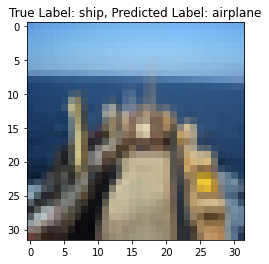

In [28]:
# Show Misclassified examples
misclassified_idx = np.where(pred_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label: %s, Predicted Label: %s" % (labels[y_test[i]], labels[pred_test[i]]));